<a href="https://colab.research.google.com/github/BardRimon/Study/blob/main/algorithms_and_data_structures/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import time
import shutil
import matplotlib.pyplot as plt


In [ ]:
# --- File generators ---

def generate_file(filename, size, ftype, lo=0, hi=1000):
    """
    Generate a file with one integer per line.
    ftype: 'random', 'sorted', 'reverse'
    lo, hi only for random
    """
    with open(filename, 'w') as f:
        if ftype == 'random':
            for _ in range(size):
                f.write(f"{random.randint(lo, hi)}\n")
        elif ftype == 'sorted':
            for i in range(size):
                f.write(f"{i}\n")
        elif ftype == 'reverse':
            for i in range(size, 0, -1):
                f.write(f"{i}\n")
        else:
            raise ValueError('Unknown ftype')


def count_lines(filename):
    with open(filename) as f:
        return sum(1 for _ in f)


In [ ]:
# --- Direct Merge Sort (two-way) ---

def direct_merge_sort_count(infile, tmp1, tmp2):
    n = count_lines(infile)
    comps = swaps = 0
    k = 1
    while k < n:
        # distribution
        with open(infile) as fin, open(tmp1, 'w') as f1, open(tmp2, 'w') as f2:
            toggle = True
            cnt = 0
            for line in fin:
                (f1 if toggle else f2).write(line)
                cnt += 1
                if cnt == k:
                    toggle = not toggle
                    cnt = 0
        # merge
        with open(tmp1) as f1, open(tmp2) as f2, open(infile, 'w') as fout:
            while True:
                run1 = []
                for _ in range(k):
                    line = f1.readline()
                    if not line: break
                    run1.append(int(line))
                run2 = []
                for _ in range(k):
                    line = f2.readline()
                    if not line: break
                    run2.append(int(line))
                if not run1 and not run2:
                    break
                i = j = 0
                while i < len(run1) and j < len(run2):
                    comps += 1
                    if run1[i] <= run2[j]:
                        fout.write(f"{run1[i]}\n"); swaps += 1; i += 1
                    else:
                        fout.write(f"{run2[j]}\n"); swaps += 1; j += 1
                for x in run1[i:]: fout.write(f"{x}\n"); swaps += 1
                for x in run2[j:]: fout.write(f"{x}\n"); swaps += 1
        k *= 2
    return comps, swaps


def direct_merge_sort_time(infile, tmp1, tmp2):
    start = time.perf_counter()
    direct_merge_sort_count(infile, tmp1, tmp2)
    end = time.perf_counter()
    return end - start


Меню:
1 - Сортировка файла
2 - Накопление статистики
3 - Сравнение методов
0 - Выход


>  2


=== Накопление статистики ===
Тип формирования: 1-random 2-sorted 3-reverse 4-all


>  1
Мин. размер:  9
Макс. размер:  90
Шаг размера:  1
Имя CSV для сохранения:  tests5


Данные сохранены в tests5


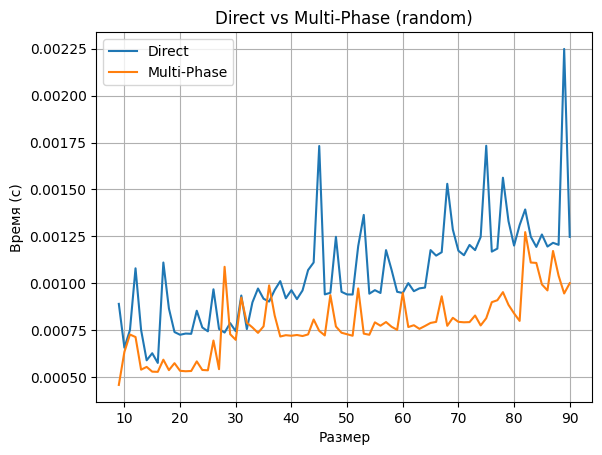

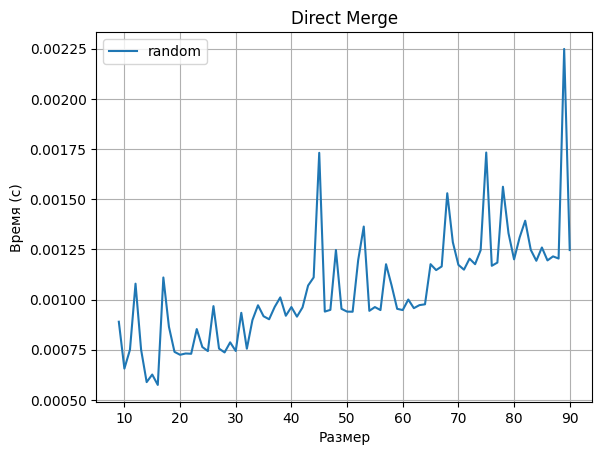

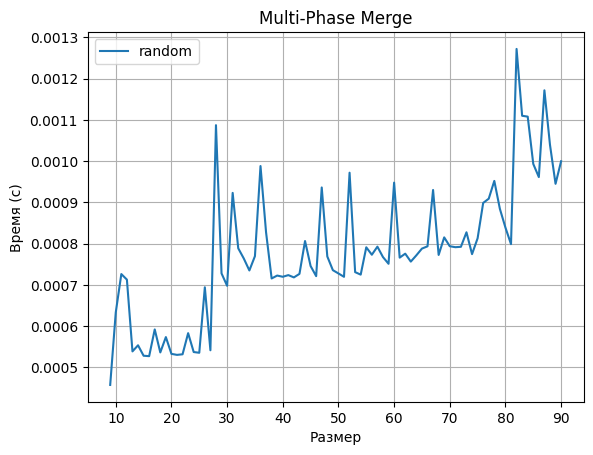


Меню:
1 - Сортировка файла
2 - Накопление статистики
3 - Сравнение методов
0 - Выход


>  0


In [3]:




# --- Multi-Phase (3-way) Merge Sort ---

def multiphase_merge_sort_count(infile, tmp_files):
    n = count_lines(infile)
    comps = swaps = 0
    k = 1
    while k < n:
        # distribution
        outs = [open(f, 'w') for f in tmp_files]
        toggle = 0; cnt = 0
        with open(infile) as fin:
            for line in fin:
                outs[toggle].write(line)
                cnt += 1
                if cnt == k:
                    toggle = (toggle + 1) % len(tmp_files)
                    cnt = 0
        for f in outs: f.close()
        # merge
        with open(infile, 'w') as fout, \
             open(tmp_files[0]) as f0, open(tmp_files[1]) as f1, open(tmp_files[2]) as f2:
            files = [f0, f1, f2]
            def read_run(f):
                run = []
                for _ in range(k):
                    line = f.readline()
                    if not line: break
                    run.append(int(line))
                return run
            runs = [read_run(f) for f in files]
            while any(runs):
                # find minimum among heads
                candidates = [(runs[i][0], i) for i in range(len(runs)) if runs[i]]
                # initial choice
                min_val, idx = candidates[0]
                for val, i in candidates[1:]:
                    comps += 1
                    if val < min_val:
                        min_val, idx = val, i
                swaps += 1
                fout.write(f"{min_val}\n")
                runs[idx].pop(0)
                # refill run
                new_run = []
                for _ in range(k):
                    line = files[idx].readline()
                    if not line: break
                    new_run.append(int(line))
                runs[idx] = new_run
        k *= len(tmp_files)
    return comps, swaps


def multiphase_merge_sort_time(infile, tmp_files):
    start = time.perf_counter()
    multiphase_merge_sort_count(infile, tmp_files)
    end = time.perf_counter()
    return end - start

# --- Modes ---

def single_mode():
    print('=== Сортировка одного файла ===')
    use = input('Использовать существующий файл? (да/нет): ')
    if use.lower().startswith('д'):
        infile = input('Имя входного файла: ')
    else:
        size = int(input('Размер последовательности: '))
        lo = int(input('Минимальное значение: '))
        hi = int(input('Максимальное значение: '))
        infile = 'input.txt'
        generate_file(infile, size, 'random', lo, hi)
        print(f'Файл {infile} сгенерирован.')

    print('Выберите метод: 1 - Direct Merge, 2 - Multi-Phase Merge')
    choice = input('> ')
    tmp_files = ['tmp1.txt', 'tmp2.txt', 'tmp3.txt']
    if choice == '1':
        comps, swaps = direct_merge_sort_count(infile, tmp_files[0], tmp_files[1])
        name = 'Direct Merge'
        tme = direct_merge_sort_time(infile, tmp_files[0], tmp_files[1])
    else:
        comps, swaps = multiphase_merge_sort_count(infile, tmp_files)
        name = 'Multi-Phase Merge'
        tme = multiphase_merge_sort_time(infile, tmp_files)
    print(f"{name}: сравнений = {comps}, перемещений = {swaps}, время = {tme:.6f} с")
    outname = input('Имя файла для сохранения результата: ')
    os.replace(infile, outname)
    print(f'Результат сохранён в {outname}')


def compare_mode():
    print('=== Сравнение методов ===')
    infile = input('Имя входного файла: ')
    work1 = 'work_direct.txt'
    work2 = 'work_multi.txt'
    shutil.copyfile(infile, work1)
    shutil.copyfile(infile, work2)
    tmp1, tmp2, tmp3 = 'tmp1.txt', 'tmp2.txt', 'tmp3.txt'

    c1, s1 = direct_merge_sort_count(work1, tmp1, tmp2)
    t1 = direct_merge_sort_time(work1, tmp1, tmp2)
    c2, s2 = multiphase_merge_sort_count(work2, [tmp1, tmp2, tmp3])
    t2 = multiphase_merge_sort_time(work2, [tmp1, tmp2, tmp3])

    print(f"Метод       | Сравнений | Перемещений | Время (с)")
    print(f"Direct      | {c1:<9} | {s1:<11} | {t1:.6f}")
    print(f"Multi-Phase | {c2:<9} | {s2:<11} | {t2:.6f}")


def stats_mode():
    print('=== Накопление статистики ===')
    print('Тип формирования: 1-random 2-sorted 3-reverse 4-all')
    t = input('> ')
    types = []
    if t == '1': types = ['random']
    elif t == '2': types = ['sorted']
    elif t == '3': types = ['reverse']
    else: types = ['random', 'sorted', 'reverse']

    lo = int(input('Мин. размер: '))
    hi = int(input('Макс. размер: '))
    step = int(input('Шаг размера: '))
    csvname = input('Имя CSV для сохранения: ')

    sizes = list(range(lo, hi+1, step))
    results = {'Direct': {ft: [] for ft in types},
               'Multi-Phase': {ft: [] for ft in types}}
    infile = 'input.txt'
    tmp_files = ['tmp1.txt', 'tmp2.txt', 'tmp3.txt']

    for ft in types:
        for n in sizes:
            generate_file(infile, n, ft, 0, n)
            dtime = direct_merge_sort_time(infile, tmp_files[0], tmp_files[1])
            mtime = multiphase_merge_sort_time(infile, tmp_files)
            results['Direct'][ft].append(dtime)
            results['Multi-Phase'][ft].append(mtime)

    with open(csvname, 'w') as f:
        header = ['size'] + [f"Direct_{ft}" for ft in types] + [f"MultiPhase_{ft}" for ft in types]
        f.write(','.join(header) + '\n')
        for i, n in enumerate(sizes):
            row = [str(n)] + \
                  [f"{results['Direct'][ft][i]:.6f}" for ft in types] + \
                  [f"{results['Multi-Phase'][ft][i]:.6f}" for ft in types]
            f.write(','.join(row) + '\n')
    print(f'Данные сохранены в {csvname}')

    # Plot comparison for random if present
    if 'random' in types:
        plt.figure()
        plt.plot(sizes, results['Direct']['random'], label='Direct')
        plt.plot(sizes, results['Multi-Phase']['random'], label='Multi-Phase')
        plt.xlabel('Размер')
        plt.ylabel('Время (с)')
        plt.title('Direct vs Multi-Phase (random)')
        plt.legend()
        plt.grid(True)
        plt.show()
    # Plot each method across types
    for method in results:
        plt.figure()
        for ft in types:
            plt.plot(sizes, results[method][ft], label=ft)
        plt.xlabel('Размер')
        plt.ylabel('Время (с)')
        plt.title(f'{method} Merge')
        plt.legend()
        plt.grid(True)
        plt.show()


def main():
    while True:
        print('\nМеню:')
        print('1 - Сортировка файла')
        print('2 - Накопление статистики')
        print('3 - Сравнение методов')
        print('0 - Выход')
        cmd = input('> ')
        if cmd == '1': single_mode()
        elif cmd == '2': stats_mode()
        elif cmd == '3': compare_mode()
        elif cmd == '0': break
        else: print('Неверный выбор, попробуйте снова.')

if __name__ == '__main__':
    main()
